In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize



files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       


prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    #priceData = get_price_data(param)
    #stock = StockDataFrame.retype(priceData)
    #price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #stock.get(string)
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    price=price.drop(['Unnamed: 0'],axis=1)
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)

          open      high       low     close   volume  close_2_sma  \
0     159.4792  159.6300  158.7700  159.0900  1400128    159.09000   
1     159.1000  159.3800  158.9000  159.2650  1009525    159.17750   
2     159.2700  159.7300  159.2050  159.2200  1104813    159.24250   
3     159.2152  159.4353  159.2150  159.2600   546638    159.24000   
4     159.2600  159.5300  159.2600  159.4350   556516    159.34750   
5     159.4400  159.6000  159.3200  159.5040   562634    159.46950   
6     159.5000  159.5067  159.2100  159.3000   478202    159.40200   
7     159.2950  159.5000  159.1500  159.4646   537703    159.38230   
8     159.4800  159.5000  159.2500  159.2700   338905    159.36730   
9     159.2700  159.3800  159.2000  159.3200   372649    159.29500   
10    159.3200  159.4200  159.1300  159.1400   353429    159.23000   
11    159.1499  159.3100  159.0800  159.1576   278415    159.14880   
12    159.1600  159.2500  159.0500  159.2000   310227    159.17880   
13    159.2000  159.

          open      high       low     close   volume  close_2_sma  \
0     118.6600  118.7100  118.6600  118.7000    43248    118.70000   
1     118.9500  119.1200  117.5600  117.8200    69261    118.26000   
2     117.8200  118.3200  117.7700  118.2300   163492    118.02500   
3     118.2200  118.4200  118.0900  118.1800    49993    118.20500   
4     118.1800  118.2452  118.0600  118.2400    40796    118.21000   
5     118.2400  118.2500  118.0000  118.1000    43877    118.17000   
6     118.1300  118.2400  118.0500  118.1200    41672    118.11000   
7     118.1101  118.2100  118.0600  118.0600    32619    118.09000   
8     118.0874  118.1400  117.9200  118.0899    28223    118.07495   
9     118.0900  118.0900  117.9300  118.0500    31569    118.06995   
10    118.0500  118.1700  117.9900  118.0050    28177    118.02750   
11    118.0108  118.0900  117.9000  118.0000    87431    118.00250   
12    117.9850  118.1000  117.9850  118.0200    43499    118.01000   
13    118.0300  118.

          open      high       low     close   volume  close_2_sma  \
0      73.2400   73.5400   73.1300   73.4100  1251715     73.41000   
1      73.4200   73.4600   73.2307   73.3200   706012     73.36500   
2      73.3250   73.5400   73.3201   73.3700   805056     73.34500   
3      73.3700   73.4800   73.3650   73.4443   449097     73.40715   
4      73.4400   73.6400   73.4100   73.6290   621930     73.53665   
5      73.6300   73.6700   73.5300   73.5301   499810     73.57955   
6      73.5300   73.6100   73.5200   73.6037   367909     73.56690   
7      73.6050   73.6100   73.4900   73.5613   416377     73.58250   
8      73.5650   73.6000   73.5200   73.5300   404542     73.54565   
9      73.5400   73.5700   73.4700   73.5000   375838     73.51500   
10     73.5000   73.5800   73.4800   73.5600   316364     73.53000   
11     73.5600   73.6000   73.5200   73.5300   274514     73.54500   
12     73.5350   73.5500   73.4900   73.5400   266033     73.53500   
13     73.5500   73.

         open     high      low    close   volume  close_2_sma  close_4_sma  \
0     36.1150  36.2200  36.0900  36.2000   388611     36.20000    36.200000   
1     36.2000  36.2600  36.1750  36.1850   661223     36.19250    36.192500   
2     36.1850  36.2800  36.1500  36.2650   571555     36.22500    36.216667   
3     36.2650  36.3400  36.2500  36.2993   544363     36.28215    36.237325   
4     36.2913  36.3200  36.2550  36.3100   334575     36.30465    36.264825   
5     36.3050  36.3250  36.2200  36.2250   594007     36.26750    36.274825   
6     36.2250  36.2250  36.1400  36.1600   882204     36.19250    36.248575   
7     36.1600  36.2400  36.1300  36.2250   504769     36.19250    36.230000   
8     36.2300  36.3100  36.2300  36.3050   280559     36.26500    36.228750   
9     36.3050  36.3600  36.3000  36.3550   405562     36.33000    36.261250   
10    36.3600  36.4300  36.3500  36.4050   742210     36.38000    36.322500   
11    36.4050  36.4600  36.3700  36.4600   606949   

         open     high      low    close   volume  close_2_sma  close_4_sma  \
0     41.5300  41.6700  41.4950  41.6700   410176     41.67000    41.670000   
1     41.6700  41.7100  41.6000  41.6750   507186     41.67250    41.672500   
2     41.6800  41.7950  41.6100  41.6600   564393     41.66750    41.668333   
3     41.6600  41.7563  41.6500  41.7450   338237     41.70250    41.687500   
4     41.7500  41.8350  41.7450  41.8200   372063     41.78250    41.725000   
5     41.8300  41.9100  41.8000  41.8300   345577     41.82500    41.763750   
6     41.8350  41.8500  41.6800  41.6800   616747     41.75500    41.768750   
7     41.6800  41.6950  41.5700  41.6100   337072     41.64500    41.735000   
8     41.6100  41.6400  41.5600  41.5850   336676     41.59750    41.676250   
9     41.5850  41.6500  41.5500  41.6300   423217     41.60750    41.626250   
10    41.6390  41.7550  41.6200  41.7500   327471     41.69000    41.643750   
11    41.7450  41.8350  41.6900  41.6900   492166   

          open      high       low     close   volume  close_2_sma  \
0     170.7255  171.2900  169.7200  170.2400   397982    170.24000   
1     170.1500  170.3200  169.1600  169.5731   401288    169.90655   
2     169.6200  169.7600  168.8000  169.0150   475729    169.29405   
3     169.0000  170.5000  168.9500  169.9480   506537    169.48150   
4     169.9999  171.4400  169.9800  171.2786   380495    170.61330   
5     171.2800  172.4500  171.2780  171.2900   428698    171.28430   
6     171.2600  171.4400  170.7600  171.0350   282036    171.16250   
7     170.9950  171.1600  170.8000  171.0700   126353    171.05250   
8     171.0800  171.3500  170.3100  170.3600   186056    170.71500   
9     170.3300  170.6000  169.8900  170.0604   196438    170.21020   
10    170.0660  170.1400  169.6100  169.8000   186358    169.93020   
11    169.8199  170.3200  169.8199  170.0500   149169    169.92500   
12    170.0773  170.2900  169.9500  170.2568   110109    170.15340   
13    170.2400  170.

          open      high       low     close  volume  close_2_sma  \
0     148.0000  148.4700  147.9100  148.2900   37870    148.29000   
1     148.3500  148.6300  148.1301  148.4700   32722    148.38000   
2     148.4475  148.9500  148.3400  148.7259   20428    148.59795   
3     148.7072  149.0500  148.6200  148.8150   25535    148.77045   
4     148.8500  149.0500  148.6700  148.8900   20850    148.85250   
5     148.9300  149.1400  148.8600  148.8600   19725    148.87500   
6     148.8200  149.2300  148.7900  149.1400   32766    149.00000   
7     149.1900  149.1900  148.7850  148.8200   41365    148.98000   
8     148.8500  149.0900  148.7100  148.7700   16851    148.79500   
9     148.8100  149.0700  148.7300  149.0700   16278    148.92000   
10    149.0500  149.2200  148.9400  149.1048   20958    149.08740   
11    149.1300  149.2050  148.9900  149.1104   18798    149.10760   
12    149.0950  149.1887  148.9100  149.0960   19508    149.10320   
13    149.1200  149.2400  149.0700

          open     high       low     close  volume  close_2_sma  close_4_sma  \
0      81.6700   81.870   81.4400   81.6300  179201     81.63000    81.630000   
1      81.5600   82.160   81.5000   82.0800  233166     81.85500    81.855000   
2      82.0900   82.120   81.9800   82.0000  257140     82.04000    81.903333   
3      82.0000   82.010   81.7600   81.7700  138358     81.88500    81.870000   
4      81.7500   81.920   81.7000   81.8900  111531     81.83000    81.935000   
5      81.8900   82.080   81.8300   81.8400   39896     81.86500    81.875000   
6      81.8200   81.880   81.7600   81.8194   43219     81.82970    81.829850   
7      81.8014   81.810   81.6900   81.7700   35348     81.79470    81.829850   
8      81.7800   81.890   81.7700   81.8900   32595     81.83000    81.829850   
9      81.8800   81.990   81.8500   81.9800   49701     81.93500    81.864850   
10     81.9800   82.100   81.9700   82.0400   67118     82.01000    81.920000   
11     82.0400   82.050   81

         open     high      low    close   volume  close_2_sma  close_4_sma  \
0     58.5300  58.7400  58.3400  58.3900   209690     58.39000    58.390000   
1     58.3800  58.5800  58.2710  58.5800   273044     58.48500    58.485000   
2     58.5700  58.6100  58.4900  58.5000   143189     58.54000    58.490000   
3     58.5000  58.6300  58.5000  58.5100   182256     58.50500    58.495000   
4     58.5100  58.6200  58.5000  58.6000   164427     58.55500    58.547500   
5     58.6000  58.7300  58.6000  58.6900   164614     58.64500    58.575000   
6     58.6800  58.7000  58.5950  58.6450   204223     58.66750    58.611250   
7     58.6450  58.6450  58.4600  58.6200   171995     58.63250    58.638750   
8     58.6300  58.7400  58.5900  58.6300   182997     58.62500    58.646250   
9     58.6400  58.7200  58.6200  58.7100    76354     58.67000    58.651250   
10    58.7000  58.8050  58.6700  58.7750   135634     58.74250    58.683750   
11    58.7750  58.8100  58.7200  58.7600   126058   

          open      high      low     close  volume  close_2_sma  close_4_sma  \
0     156.6700  157.2800  156.650  156.8000   38868    156.80000   156.800000   
1     156.8600  157.5250  156.805  157.5200   55472    157.16000   157.160000   
2     157.4500  157.6500  157.265  157.3500   62948    157.43500   157.223333   
3     157.3400  157.4700  157.070  157.1200   66737    157.23500   157.197500   
4     157.1200  157.4200  156.940  157.4200   38421    157.27000   157.352500   
5     157.4400  157.6800  157.400  157.6100   26049    157.51500   157.375000   
6     157.6130  157.8600  157.595  157.8400   52373    157.72500   157.497500   
7     157.8600  158.1000  157.780  157.9500   69844    157.89500   157.705000   
8     157.9700  158.0000  157.720  157.7700   38791    157.86000   157.792500   
9     157.7700  157.9600  157.740  157.9200   36619    157.84500   157.870000   
10    157.9018  157.9700  157.850  157.9001   27773    157.91005   157.885025   
11    157.9000  157.9800  15

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL
111
68
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5483443708609271
0.5512367491166078
F1,score 0.6033003300330032
G-score: 0.32662529044049876
Accuracy 0.46908127208480566
Window: 140
[[ 74 434]
 [167 457]]
Vol pos 3.403085361924532
Vol neg 2.940116492494718


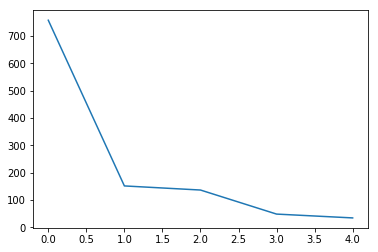

Real Percentage of gain: -43.03119033230805
Percentage of gain: 0.035360702466962
Total gain: 40.028315192600985
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 12 372]
 [ 56 319]]
0.43610013175230566
Percentile:  1
[[14 52]
 [14 70]]
0.56
Percentile:  2
[[48 10]
 [53 26]]
0.5401459854014599
Percentile:  3
[[ 0  0]
 [18 31]]
0.6326530612244898
Percentile:  4
[[ 0  0]
 [25 10]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... AMZN
111
67
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.681828218149702
0.7782685512367491
F1,score 0.36042402826855124
G-score: 0.4338157870933049
Accuracy 0.36042402826855124
Window: 140
[[204  47]
 [677 204]]
Vol pos 2.414333398222532
Vol neg 2.3269665722201953


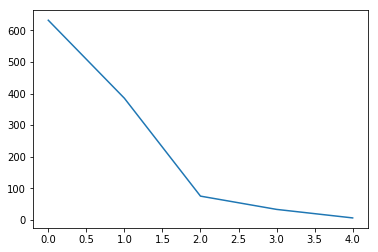

Real Percentage of gain: -140.66548711832468
Percentage of gain: -0.6180881376436647
Total gain: -699.6757718126285
000000000000000000000000000000000000000000000000
Percentile:  0
[[178  21]
 [351  81]]
0.410459587955626
Percentile:  1
[[ 22  14]
 [270  79]]
0.2623376623376623
Percentile:  2
[[ 4 12]
 [51  8]]
0.16
Percentile:  3
[[ 0  0]
 [ 4 29]]
0.8787878787878788
Percentile:  4
[[6]]
1.0
000000000000000000000000000000000000000000000000
Working on... PEP
111
72
5.495274763738178
0.0
Diff in tren train and test
0.32886163280950553
0.8634969325153374
F1,score 0.4339360222531294
G-score: 0.5263905714845012
Accuracy 0.37576687116564417
Window: 140
[[ 89   0]
 [407 156]]
Vol pos 1.5902790666105484
Vol neg 2.3922867173498212


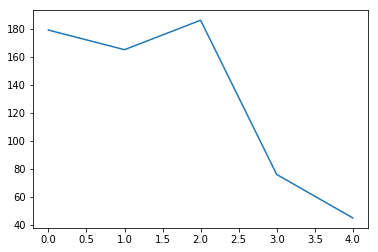

Real Percentage of gain: -78.89032988958587
Percentage of gain: -0.8957704334996823
Total gain: -584.0423226417929
000000000000000000000000000000000000000000000000
Percentile:  0
[[70  0]
 [75 34]]
0.5810055865921788
Percentile:  1
[[ 19   0]
 [118  28]]
0.28484848484848485
Percentile:  2
[[  0   0]
 [105  81]]
0.43548387096774194
Percentile:  3
[[ 0  0]
 [63 13]]
0.17105263157894737
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
111
75
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6281739898432325
0.598939929328622
F1,score 0.6514745308310992
G-score: 0.4460264706166453
Accuracy 0.5406360424028268
Window: 140
[[126 328]
 [192 486]]
Vol pos 3.0938492855325346
Vol neg 2.7720842742533813


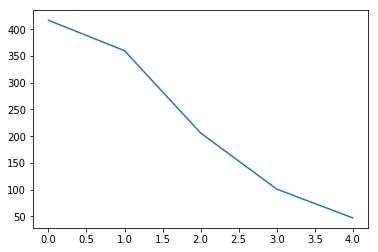

Real Percentage of gain: 8.211287178429194
Percentage of gain: 0.3992508305072022
Total gain: 451.9519401341529
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 81 150]
 [ 65 120]]
0.4831730769230769
Percentile:  1
[[ 17  94]
 [ 44 205]]
0.6166666666666667
Percentile:  2
[[26 71]
 [27 82]]
0.5242718446601942
Percentile:  3
[[ 2 12]
 [47 40]]
0.4158415841584158
Percentile:  4
[[ 0  0]
 [ 9 38]]
0.8085106382978723
000000000000000000000000000000000000000000000000
Working on... MSFT
111
72
5.843279709392834
0.0
Diff in tren train and test
0.6783664459161148
0.622791519434629
F1,score 0.1768368617683686
G-score: 0.307150109169239
Accuracy 0.4160777385159011
Window: 140
[[400  27]
 [634  71]]
Vol pos 1.4052636207537605
Vol neg 1.6824972876697362


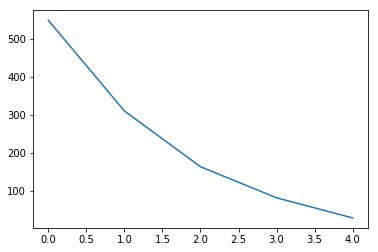

Real Percentage of gain: -42.6125250214469
Percentage of gain: -0.39774871181508337
Total gain: -450.25154177467437
000000000000000000000000000000000000000000000000
Percentile:  0
[[278  22]
 [236  13]]
0.5300546448087432
Percentile:  1
[[ 69   5]
 [221  15]]
0.2709677419354839
Percentile:  2
[[ 23   0]
 [118  22]]
0.27607361963190186
Percentile:  3
[[20  0]
 [46 15]]
0.43209876543209874
Percentile:  4
[[10  0]
 [12  6]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... FB
111
77
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5688741721854305
0.7676678445229682
F1,score 0.6311239193083573
G-score: 0.5905885009393927
Accuracy 0.5477031802120141
Window: 140
[[182  81]
 [431 438]]
Vol pos 3.4209059899831704
Vol neg 2.6665096883867148


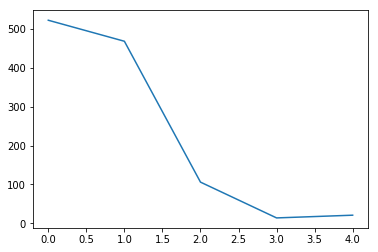

Real Percentage of gain: -13.731645494664948
Percentage of gain: 0.6675872379289468
Total gain: 755.7087533355677
000000000000000000000000000000000000000000000000
Percentile:  0
[[174  38]
 [230  80]]
0.48659003831417624
Percentile:  1
[[  7  30]
 [186 245]]
0.5384615384615384
Percentile:  2
[[ 0 13]
 [13 79]]
0.7523809523809524
Percentile:  3
[[14]]
1.0
Percentile:  4
[[ 0  0]
 [ 2 19]]
0.9047619047619048
000000000000000000000000000000000000000000000000
Working on... INTC
111
76
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.5922737306843268
0.6033568904593639
F1,score 0.22515212981744423
G-score: 0.3049962704285069
Accuracy 0.3250883392226148
Window: 140
[[257 192]
 [572 111]]
Vol pos 2.3970926307688982
Vol neg 2.30404806108282


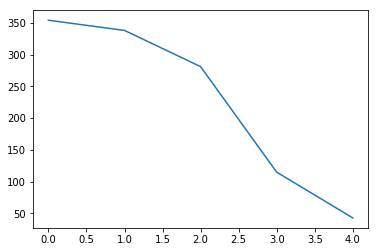

Real Percentage of gain: -138.1287231794526
Percentage of gain: -0.7757620411168904
Total gain: -878.1626305443199
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 74  42]
 [181  57]]
0.3700564971751412
Percentile:  1
[[ 56  58]
 [201  26]]
0.2404692082111437
Percentile:  2
[[ 70  57]
 [131  20]]
0.3237410071942446
Percentile:  3
[[33 30]
 [50  1]]
0.2982456140350877
Percentile:  4
[[24  5]
 [ 8  6]]
0.6976744186046512
000000000000000000000000000000000000000000000000
Working on... CSCO
111
67
6.455652128779988
0.0
Diff in tren train and test
0.6774122322808567
0.5485865724381626
F1,score 0.2673267326732673
G-score: 0.38344007505698186
Accuracy 0.47703180212014135
Window: 140
[[432  79]
 [513 108]]
Vol pos 2.117887259900947
Vol neg 1.5943883709279392


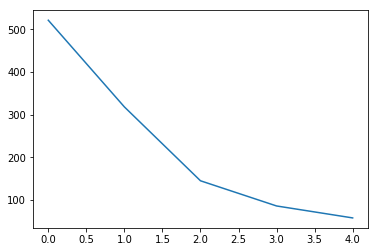

Real Percentage of gain: 21.95240789639128
Percentage of gain: 0.17648516321304894
Total gain: 199.7812047571714
000000000000000000000000000000000000000000000000
Percentile:  0
[[197  34]
 [230  60]]
0.4932821497120921
Percentile:  1
[[ 76  29]
 [191  22]]
0.3081761006289308
Percentile:  2
[[52 12]
 [67 14]]
0.45517241379310347
Percentile:  3
[[55  3]
 [22  6]]
0.7093023255813954
Percentile:  4
[[51  1]
 [ 1  5]]
0.9655172413793104
000000000000000000000000000000000000000000000000
Working on... CMCSA
111
72
10.63829787234043
0.0
Diff in tren train and test
0.4561713402517112
0.5220848056537103
F1,score 0.5646879756468798
G-score: 0.4683014299561816
Accuracy 0.49469964664310956
Window: 140
[[189 352]
 [220 371]]
Vol pos 3.007147886446894
Vol neg 2.7129021048758526


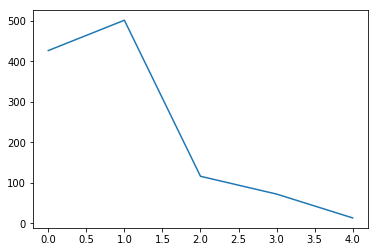

Real Percentage of gain: 96.27043482429642
Percentage of gain: 0.11680460461243171
Total gain: 132.2228124212727
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 59 168]
 [ 87 113]]
0.4028103044496487
Percentile:  1
[[ 92 106]
 [117 187]]
0.5557768924302788
Percentile:  2
[[24 18]
 [12 62]]
0.7413793103448276
Percentile:  3
[[14 46]
 [ 3  9]]
0.3194444444444444
Percentile:  4
[[ 0 13]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
111
71
14.360220994475142
0.0
Diff in tren train and test
0.64878587196468
0.5795053003533569
F1,score 0.4933586337760911
G-score: 0.5305051790790729
Accuracy 0.5282685512367491
Window: 140
[[338 138]
 [396 260]]
Vol pos 3.993950316223384
Vol neg 3.523151047099496


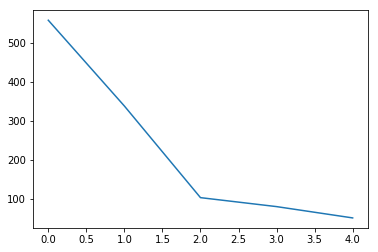

Real Percentage of gain: 67.14697766503727
Percentage of gain: 0.4478971996028733
Total gain: 507.0196299504526
000000000000000000000000000000000000000000000000
Percentile:  0
[[225  87]
 [192  54]]
0.5
Percentile:  1
[[103  15]
 [120 100]]
0.6005917159763313
Percentile:  2
[[ 9 22]
 [54 18]]
0.2621359223300971
Percentile:  3
[[ 1 14]
 [13 52]]
0.6625
Percentile:  4
[[ 0  0]
 [16 35]]
0.6862745098039216
000000000000000000000000000000000000000000000000
Working on... NFLX
111
75
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6529035107087657
0.7376325088339223
F1,score 0.11243243243243242
G-score: 0.23303979600728153
Accuracy 0.2747349823321555
Window: 140
[[259  38]
 [783  52]]
Vol pos 2.9123008942255484
Vol neg 4.8787685933657565


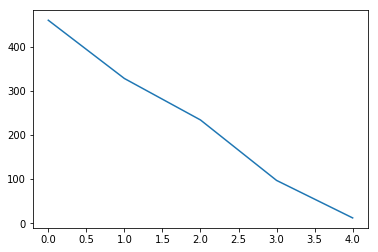

Real Percentage of gain: -359.7957366973402
Percentage of gain: -2.7382892553437643
Total gain: -3099.743437049141
000000000000000000000000000000000000000000000000
Percentile:  0
[[154  16]
 [255  35]]
0.4108695652173913
Percentile:  1
[[ 58   2]
 [252  16]]
0.22560975609756098
Percentile:  2
[[ 29   9]
 [194   1]]
0.12875536480686695
Percentile:  3
[[16 11]
 [70  0]]
0.16494845360824742
Percentile:  4
[[ 1  0]
 [11  0]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
111
64
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5880195599022005
0.6748166259168704
F1,score 0.6944908180300501
G-score: 0.3193651761292906
Accuracy 0.5525672371638142
Window: 140
[[ 18 115]
 [ 68 208]]
Vol pos 1.286959836553673
Vol neg 0.8665465435725747


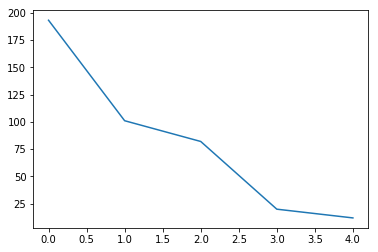

Real Percentage of gain: 72.93882631784439
Percentage of gain: 0.32341052710843254
Total gain: 132.2749055873489
000000000000000000000000000000000000000000000000
Percentile:  0
[[17 82]
 [22 75]]
0.46938775510204084
Percentile:  1
[[ 0 26]
 [25 47]]
0.47959183673469385
Percentile:  2
[[ 1  6]
 [17 58]]
0.7195121951219512
Percentile:  3
[[ 0  0]
 [ 4 15]]
0.7894736842105263
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
111
67
9.949148290880911
0.0
Diff in tren train and test
0.714569536423841
0.6528268551236749
F1,score 0.41988950276243087
G-score: 0.4637930223777818
Accuracy 0.44346289752650175
Window: 140
[[274 119]
 [511 228]]
Vol pos 3.01730048335648
Vol neg 2.3368854956485445


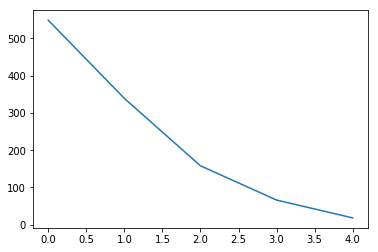

Real Percentage of gain: -136.74457445444543
Percentage of gain: 0.03749733249679298
Total gain: 42.44698038636966
000000000000000000000000000000000000000000000000
Percentile:  0
[[190  77]
 [234  48]]
0.4335154826958106
Percentile:  1
[[ 50  28]
 [197  64]]
0.336283185840708
Percentile:  2
[[12 13]
 [75 58]]
0.4430379746835443
Percentile:  3
[[22  1]
 [ 4 39]]
0.9242424242424242
Percentile:  4
[[18]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
111
82
6.235840507476206
0.0
Diff in tren train and test
0.5365422830646942
0.7190812720848057
F1,score 0.7003194888178914
G-score: 0.49341623714894567
Accuracy 0.5856890459363958
Window: 140
[[115 203]
 [266 548]]
Vol pos 1.7697572764050336
Vol neg 2.078516087166026


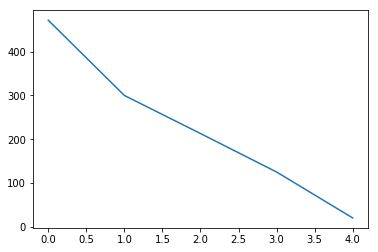

Real Percentage of gain: 156.1617528041986
Percentage of gain: 0.17537546764635248
Total gain: 198.525029375671
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 69  94]
 [ 82 227]]
0.6271186440677966
Percentile:  1
[[ 23  32]
 [ 85 160]]
0.61
Percentile:  2
[[  8  18]
 [ 80 107]]
0.539906103286385
Percentile:  3
[[12 44]
 [19 50]]
0.496
Percentile:  4
[[ 3 14]
 [ 0  3]]
0.3
000000000000000000000000000000000000000000000000
Working on... TXN
111
66
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6904393905939501
0.6740282685512368
F1,score 0.5607985480943738
G-score: 0.6099632036476027
Accuracy 0.5724381625441696
Window: 140
[[339  30]
 [454 309]]
Vol pos 2.336111924735066
Vol neg 2.7080246206527407


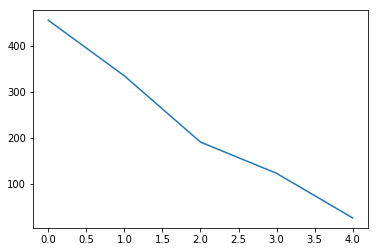

Real Percentage of gain: -15.050966307508256
Percentage of gain: 0.1794316350109509
Total gain: 203.11661083239642
000000000000000000000000000000000000000000000000
Percentile:  0
[[200   8]
 [173  74]]
0.6021978021978022
Percentile:  1
[[116  14]
 [ 89 116]]
0.6925373134328359
Percentile:  2
[[  7   7]
 [116  62]]
0.359375
Percentile:  3
[[ 9  1]
 [71 41]]
0.4098360655737705
Percentile:  4
[[ 7  0]
 [ 4 15]]
0.8461538461538461
000000000000000000000000000000000000000000000000
Working on... AVGO
111
79
10.183057294555825
0.0
Diff in tren train and test
0.502539191874586
0.6369257950530035
F1,score 0.6002886002886003
G-score: 0.4768871598951126
Accuracy 0.5106007067137809
Window: 140
[[162 249]
 [305 416]]
Vol pos 3.6788604190736818
Vol neg 2.5857669242320367


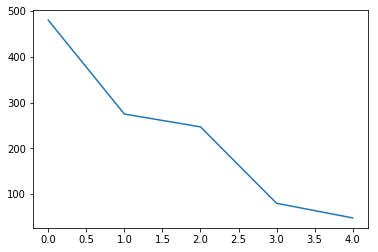

Real Percentage of gain: 61.398296299272744
Percentage of gain: 0.612956224558339
Total gain: 693.8664462000397
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 55 151]
 [119 155]]
0.4375
Percentile:  1
[[30 95]
 [74 76]]
0.38545454545454544
Percentile:  2
[[ 22   3]
 [ 83 139]]
0.6518218623481782
Percentile:  3
[[17  0]
 [19 44]]
0.7625
Percentile:  4
[[37  0]
 [10  1]]
0.7916666666666666
000000000000000000000000000000000000000000000000
Working on... PYPL
111
79
12.136266855926186
0.0
Diff in tren train and test
0.704635761589404
0.7164310954063604
F1,score 0.5953757225433526
G-score: 0.5032058206813464
Accuracy 0.5053003533568905
Window: 140
[[160 161]
 [399 412]]
Vol pos 3.1854081945006296
Vol neg 2.6105425149769106


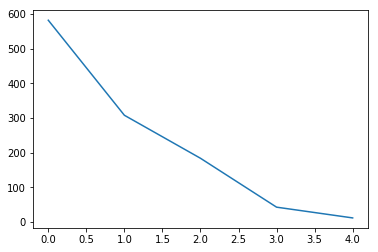

Real Percentage of gain: -49.01315969373801
Percentage of gain: 0.3181534265612105
Total gain: 360.1496788672903
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 54  83]
 [233 212]]
0.4570446735395189
Percentile:  1
[[ 32  19]
 [128 129]]
0.5227272727272727
Percentile:  2
[[67 53]
 [33 31]]
0.532608695652174
Percentile:  3
[[ 7  6]
 [ 5 25]]
0.7441860465116279
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
111
77
12.867944909532813
0.0
Diff in tren train and test
0.47747349823321555
0.49469964664310956
F1,score 0.1541802388707926
G-score: 0.25001248720062713
Accuracy 0.3118374558303887
Window: 140
[[282 290]
 [489  71]]
Vol pos 1.9626452588073846
Vol neg 3.7921685009160546


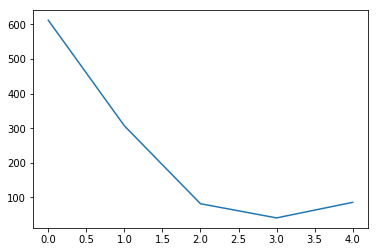

Real Percentage of gain: -358.18948322756097
Percentage of gain: -1.9976020193061836
Total gain: -2261.2854858545998
000000000000000000000000000000000000000000000000
Percentile:  0
[[204 125]
 [214  69]]
0.44607843137254904
Percentile:  1
[[ 57  46]
 [202   2]]
0.19218241042345277
Percentile:  2
[[ 0 12]
 [70  0]]
0.0
Percentile:  3
[[ 6 35]
 [ 0  0]]
0.14634146341463414
Percentile:  4
[[15 71]
 [ 0  0]]
0.1744186046511628
000000000000000000000000000000000000000000000000
Working on... COST
111
75
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6527593818984547
0.676678445229682
F1,score 0.20956719817767652
G-score: 0.33695898053544077
Accuracy 0.3869257950530035
Window: 140
[[346  20]
 [674  92]]
Vol pos 1.2451451401960179
Vol neg 1.5356550195854384


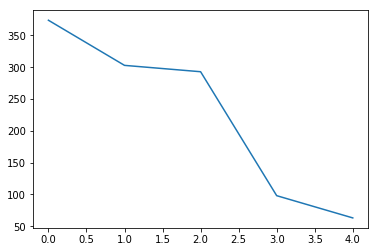

Real Percentage of gain: -160.68849289629992
Percentage of gain: -0.45969170687847916
Total gain: -520.3710121864384
000000000000000000000000000000000000000000000000
Percentile:  0
[[170  18]
 [173  12]]
0.4879356568364611
Percentile:  1
[[ 96   1]
 [182  24]]
0.39603960396039606
Percentile:  2
[[ 67   1]
 [204  21]]
0.3003412969283277
Percentile:  3
[[12  0]
 [76 10]]
0.22448979591836735
Percentile:  4
[[ 0  0]
 [39 24]]
0.38095238095238093
000000000000000000000000000000000000000000000000
Working on... QCOM
111
70
11.725006748852696
0.0
Diff in tren train and test
0.47770419426048566
0.6855123674911661
F1,score 0.5990016638935108
G-score: 0.614744128909522
Accuracy 0.5742049469964664
Window: 140
[[290  66]
 [416 360]]
Vol pos 3.943361270099788
Vol neg 2.52256451058623


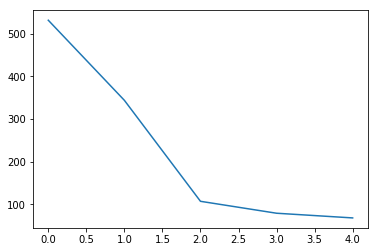

Real Percentage of gain: 77.90267749699146
Percentage of gain: 1.1902020595956708
Total gain: 1347.3087314622994
000000000000000000000000000000000000000000000000
Percentile:  0
[[186  47]
 [194 105]]
0.5469924812030075
Percentile:  1
[[ 44   4]
 [202  94]]
0.4011627906976744
Percentile:  2
[[ 3 14]
 [17 73]]
0.7102803738317757
Percentile:  3
[[11  0]
 [ 3 65]]
0.9620253164556962
Percentile:  4
[[45  1]
 [ 0 22]]
0.9852941176470589
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.4626269527662962
Mean gain over portfolio :  -171.45655816804808
Real mean gain over portfolio -48.72798269151073


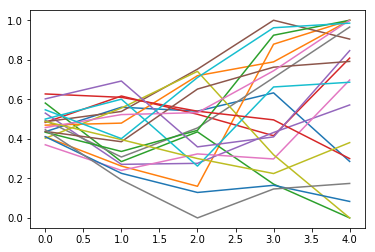

In [3]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        firstprice=price.iloc[1]['open']
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        rf = RandomForestClassifier()
        rf.fit(x, y)
        
       
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        
        treshold=0.9
        optimum=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimum=order[0:u]
                break
        
        print(len(x[0]))
        
        x=x[:,optimum]
        print(len(x[0]))
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

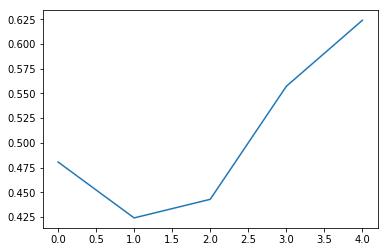

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
111
49
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5483443708609271
0.5512367491166078
F1,score 0.663727959697733
G-score: 0.3435661205420766
Accuracy 0.5282685512367491
Window: 140
[[ 71 437]
 [ 97 527]]
Vol pos 3.4402113026029895
Vol neg 2.840453146469408


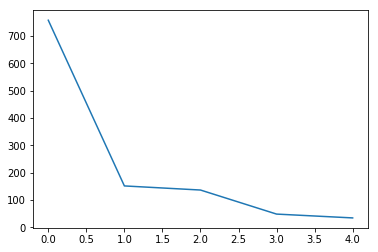

Real Percentage of gain: 1.4979055243021162
Percentage of gain: 0.47742436284622247
Total gain: 540.4443787419239
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 14 370]
 [ 14 361]]
0.49407114624505927
Percentile:  1
[[14 52]
 [ 9 75]]
0.5933333333333334
Percentile:  2
[[43 15]
 [39 40]]
0.6058394160583942
Percentile:  3
[[ 0  0]
 [12 37]]
0.7551020408163265
Percentile:  4
[[ 0  0]
 [22 13]]
0.37142857142857144
000000000000000000000000000000000000000000000000
Working on... AMZN
111
48
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.681828218149702
0.7782685512367491
F1,score 0.16477857878475796
G-score: 0.29527637451792443
Accuracy 0.2835689045936396
Window: 140
[[241  10]
 [801  80]]
Vol pos 2.380874223706399
Vol neg 2.349582242851368


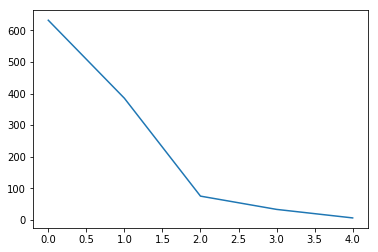

Real Percentage of gain: -202.6049802442305
Percentage of gain: -1.0081718844016831
Total gain: -1141.2505731427054
000000000000000000000000000000000000000000000000
Percentile:  0
[[197   2]
 [405  27]]
0.3549920760697306
Percentile:  1
[[ 30   6]
 [331  18]]
0.12467532467532468
Percentile:  2
[[14  2]
 [55  4]]
0.24
Percentile:  3
[[ 0  0]
 [ 9 24]]
0.7272727272727273
Percentile:  4
[[6]]
1.0
000000000000000000000000000000000000000000000000
Working on... PEP
111
55
5.495274763738178
0.0
Diff in tren train and test
0.32886163280950553
0.8634969325153374
F1,score 0.2990936555891239
G-score: 0.41933720857298523
Accuracy 0.2883435582822086
Window: 140
[[ 89   0]
 [464  99]]
Vol pos 1.730591023209675
Vol neg 2.2369136916326355


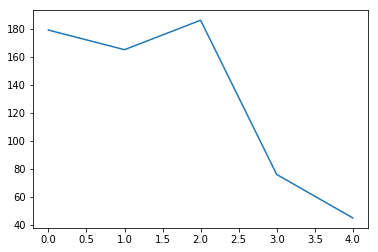

Real Percentage of gain: -96.6606415177287
Percentage of gain: -1.0929092646535643
Total gain: -712.5768405541239
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 70   0]
 [105   4]]
0.4134078212290503
Percentile:  1
[[ 19   0]
 [141   5]]
0.14545454545454545
Percentile:  2
[[  0   0]
 [109  77]]
0.41397849462365593
Percentile:  3
[[ 0  0]
 [63 13]]
0.17105263157894737
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
111
59
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6281739898432325
0.598939929328622
F1,score 0.6510381781647688
G-score: 0.4442529985012172
Accuracy 0.5397526501766784
Window: 140
[[125 329]
 [192 486]]
Vol pos 3.1207869532303705
Vol neg 2.741110857838606


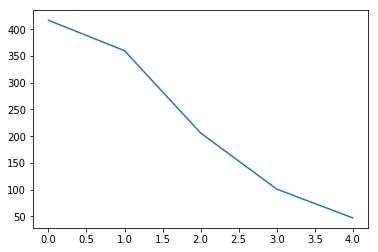

Real Percentage of gain: 18.76990192362736
Percentage of gain: 0.4228640207507446
Total gain: 478.6820714898428
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 82 149]
 [ 69 116]]
0.47596153846153844
Percentile:  1
[[ 16  95]
 [ 52 197]]
0.5916666666666667
Percentile:  2
[[27 70]
 [21 88]]
0.558252427184466
Percentile:  3
[[ 0 14]
 [44 43]]
0.42574257425742573
Percentile:  4
[[ 0  0]
 [ 6 41]]
0.8723404255319149
000000000000000000000000000000000000000000000000
Working on... MSFT
111
57
5.843279709392834
0.0
Diff in tren train and test
0.6783664459161148
0.622791519434629
F1,score 0.22355769230769232
G-score: 0.3484410015999751
Accuracy 0.4293286219081272
Window: 140
[[393  34]
 [612  93]]
Vol pos 1.4498165094947992
Vol neg 1.655416484381182


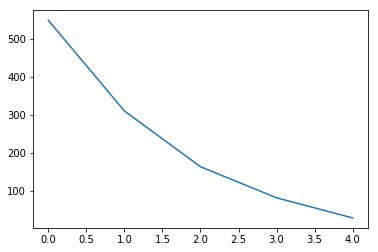

Real Percentage of gain: -39.40564020861416
Percentage of gain: -0.32225108241675904
Total gain: -364.7882252957712
000000000000000000000000000000000000000000000000
Percentile:  0
[[273  27]
 [235  14]]
0.5227686703096539
Percentile:  1
[[ 67   7]
 [207  29]]
0.3096774193548387
Percentile:  2
[[ 23   0]
 [112  28]]
0.3128834355828221
Percentile:  3
[[20  0]
 [46 15]]
0.43209876543209874
Percentile:  4
[[10  0]
 [11  7]]
0.6071428571428571
000000000000000000000000000000000000000000000000
Working on... FB
111
59
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5688741721854305
0.7676678445229682
F1,score 0.6154981549815499
G-score: 0.5949509056873992
Accuracy 0.5397526501766784
Window: 140
[[194  69]
 [452 417]]
Vol pos 3.3394206116284266
Vol neg 2.7751030336633287


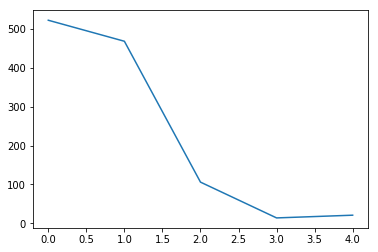

Real Percentage of gain: -22.190537911633342
Percentage of gain: 0.525227308450861
Total gain: 594.5573131663746
000000000000000000000000000000000000000000000000
Percentile:  0
[[179  33]
 [237  73]]
0.4827586206896552
Percentile:  1
[[ 14  23]
 [191 240]]
0.5427350427350427
Percentile:  2
[[ 0 13]
 [16 76]]
0.7238095238095238
Percentile:  3
[[ 0  0]
 [ 4 10]]
0.7142857142857143
Percentile:  4
[[ 0  0]
 [ 4 17]]
0.8095238095238095
000000000000000000000000000000000000000000000000
Working on... INTC
111
56
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.5922737306843268
0.6033568904593639
F1,score 0.008746355685131196
G-score: 0.06627508227090059
Accuracy 0.3992932862190813
Window: 140
[[449   0]
 [680   3]]
Vol pos 2.628835157512361
Vol neg 2.138513699403887


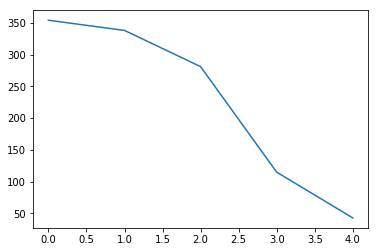

Real Percentage of gain: -98.96014428984235
Percentage of gain: -0.2349433077730176
Total gain: -265.9558243990559
000000000000000000000000000000000000000000000000
Percentile:  0
[[116   0]
 [237   1]]
0.3305084745762712
Percentile:  1
[[114   0]
 [225   2]]
0.34017595307917886
Percentile:  2
[[127   0]
 [151   0]]
0.4568345323741007
Percentile:  3
[[63  0]
 [51  0]]
0.5526315789473685
Percentile:  4
[[29  0]
 [14  0]]
0.6744186046511628
000000000000000000000000000000000000000000000000
Working on... CSCO
111
48
6.455652128779988
0.0
Diff in tren train and test
0.6774122322808567
0.5485865724381626
F1,score 0.09883720930232558
G-score: 0.22630656705602897
Accuracy 0.45229681978798586
Window: 140
[[478  33]
 [587  34]]
Vol pos 2.135962802822076
Vol neg 1.6031033562757229


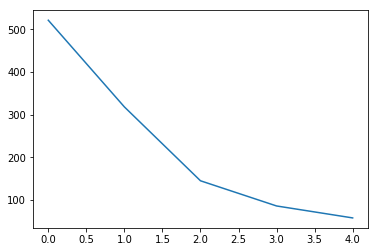

Real Percentage of gain: 40.947881302653066
Percentage of gain: 0.08806437646109079
Total gain: 99.68887415395477
000000000000000000000000000000000000000000000000
Percentile:  0
[[221  10]
 [276  14]]
0.4510556621880998
Percentile:  1
[[ 94  11]
 [202  11]]
0.330188679245283
Percentile:  2
[[59  5]
 [77  4]]
0.43448275862068964
Percentile:  3
[[52  6]
 [25  3]]
0.6395348837209303
Percentile:  4
[[51  1]
 [ 4  2]]
0.9137931034482759
000000000000000000000000000000000000000000000000
Working on... CMCSA
111
56
10.63829787234043
0.0
Diff in tren train and test
0.4561713402517112
0.5220848056537103
F1,score 0.6568877551020409
G-score: 0.35671780514497947
Accuracy 0.5247349823321554
Window: 140
[[ 79 462]
 [ 76 515]]
Vol pos 2.962129719867937
Vol neg 2.7440107189548217


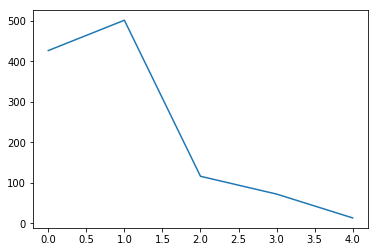

Real Percentage of gain: 148.25010786710763
Percentage of gain: 0.25020078339563634
Total gain: 283.22728680386035
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 10 217]
 [ 40 160]]
0.3981264637002342
Percentile:  1
[[ 39 159]
 [ 27 277]]
0.6294820717131474
Percentile:  2
[[16 26]
 [ 7 67]]
0.7155172413793104
Percentile:  3
[[14 46]
 [ 2 10]]
0.3333333333333333
Percentile:  4
[[ 0 13]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
111
53
14.360220994475142
0.0
Diff in tren train and test
0.64878587196468
0.5795053003533569
F1,score 0.4780952380952381
G-score: 0.5173727866132273
Accuracy 0.5159010600706714
Window: 140
[[333 143]
 [405 251]]
Vol pos 3.9267432231108614
Vol neg 3.606800923277318


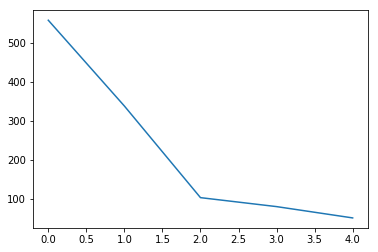

Real Percentage of gain: 41.73694239930716
Percentage of gain: 0.27976248793354486
Total gain: 316.6911363407728
000000000000000000000000000000000000000000000000
Percentile:  0
[[216  96]
 [181  65]]
0.503584229390681
Percentile:  1
[[105  13]
 [137  83]]
0.5562130177514792
Percentile:  2
[[12 19]
 [50 22]]
0.3300970873786408
Percentile:  3
[[ 0 15]
 [16 49]]
0.6125
Percentile:  4
[[ 0  0]
 [20 31]]
0.6078431372549019
000000000000000000000000000000000000000000000000
Working on... NFLX
111
55
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6529035107087657
0.7376325088339223
F1,score 0.066006600660066
G-score: 0.17494415038850644
Accuracy 0.25
Window: 140
[[253  44]
 [805  30]]
Vol pos 3.2182585404508632
Vol neg 4.711928652897335


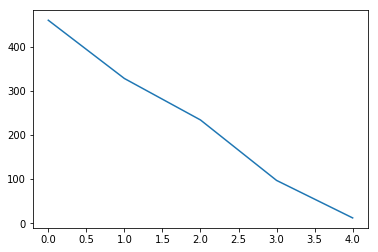

Real Percentage of gain: -404.19345970160157
Percentage of gain: -2.7293818545602853
Total gain: -3089.660259362243
000000000000000000000000000000000000000000000000
Percentile:  0
[[142  28]
 [270  20]]
0.3521739130434783
Percentile:  1
[[ 59   1]
 [260   8]]
0.20426829268292682
Percentile:  2
[[ 30   8]
 [195   0]]
0.12875536480686695
Percentile:  3
[[20  7]
 [68  2]]
0.2268041237113402
Percentile:  4
[[ 1  0]
 [11  0]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
111
41
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5880195599022005
0.6748166259168704
F1,score 0.6903553299492385
G-score: 0.3496600880599409
Accuracy 0.5525672371638142
Window: 140
[[ 22 111]
 [ 72 204]]
Vol pos 1.1987202233163101
Vol neg 0.9755200550023225


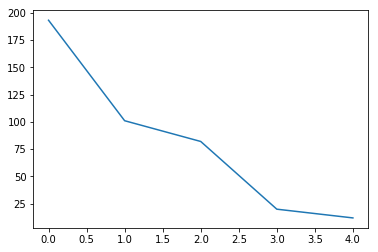

Real Percentage of gain: 57.48652211425725
Percentage of gain: 0.22589388851848666
Total gain: 92.39060040406105
000000000000000000000000000000000000000000000000
Percentile:  0
[[21 78]
 [15 82]]
0.5255102040816326
Percentile:  1
[[ 1 25]
 [23 49]]
0.5102040816326531
Percentile:  2
[[ 0  7]
 [28 47]]
0.573170731707317
Percentile:  3
[[ 0  0]
 [ 6 13]]
0.6842105263157895
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
111
48
9.949148290880911
0.0
Diff in tren train and test
0.714569536423841
0.6528268551236749
F1,score 0.5347166799680766
G-score: 0.4968334135951988
Accuracy 0.48498233215547704
Window: 140
[[214 179]
 [404 335]]
Vol pos 2.9082858368448523
Vol neg 2.3846891603356988


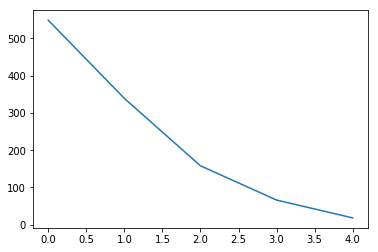

Real Percentage of gain: -94.72449789427928
Percentage of gain: 0.18231019783755437
Total gain: 206.37514395211156
000000000000000000000000000000000000000000000000
Percentile:  0
[[140 127]
 [131 151]]
0.5300546448087432
Percentile:  1
[[ 27  51]
 [198  63]]
0.26548672566371684
Percentile:  2
[[24  1]
 [69 64]]
0.5569620253164557
Percentile:  3
[[23  0]
 [ 6 37]]
0.9090909090909091
Percentile:  4
[[18]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
111
67
6.235840507476206
0.0
Diff in tren train and test
0.5365422830646942
0.7190812720848057
F1,score 0.7017543859649122
G-score: 0.4557260640144411
Accuracy 0.5795053003533569
Window: 140
[[ 96 222]
 [254 560]]
Vol pos 1.6961640211626816
Vol neg 2.175398153896394


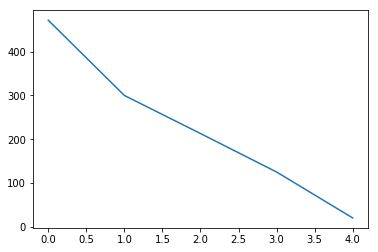

Real Percentage of gain: 151.0016525944328
Percentage of gain: 0.06819264719791135
Total gain: 77.19407662803565
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64  99]
 [ 67 242]]
0.6483050847457628
Percentile:  1
[[ 17  38]
 [ 83 162]]
0.5966666666666667
Percentile:  2
[[  5  21]
 [ 76 111]]
0.5446009389671361
Percentile:  3
[[ 9 47]
 [28 41]]
0.4
Percentile:  4
[[ 1 16]
 [ 0  3]]
0.2
000000000000000000000000000000000000000000000000
Working on... TXN
111
47
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6904393905939501
0.6740282685512368
F1,score 0.5132890365448505
G-score: 0.510009141636963
Accuracy 0.4823321554770318
Window: 140
[[237 132]
 [454 309]]
Vol pos 2.4440438319969657
Vol neg 2.5427244221056404


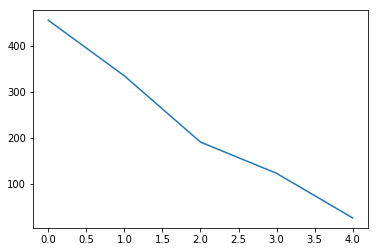

Real Percentage of gain: -91.96322900632791
Percentage of gain: -0.13744574123989584
Total gain: -155.58857908356208
000000000000000000000000000000000000000000000000
Percentile:  0
[[159  49]
 [184  63]]
0.4879120879120879
Percentile:  1
[[ 66  64]
 [ 99 106]]
0.5134328358208955
Percentile:  2
[[ 6  8]
 [96 82]]
0.4583333333333333
Percentile:  3
[[ 4  6]
 [67 45]]
0.4016393442622951
Percentile:  4
[[ 2  5]
 [ 7 12]]
0.5384615384615384
000000000000000000000000000000000000000000000000
Working on... AVGO
111
61
10.183057294555825
0.0
Diff in tren train and test
0.502539191874586
0.6369257950530035
F1,score 0.6180014174344437
G-score: 0.4806229752178005
Accuracy 0.523851590106007
Window: 140
[[157 254]
 [285 436]]
Vol pos 4.016743688577771
Vol neg 2.1836125991141295


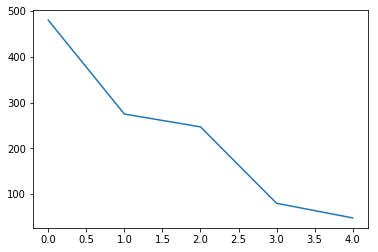

Real Percentage of gain: 67.01112227267258
Percentage of gain: 1.0644539014170513
Total gain: 1204.9618164041021
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 51 155]
 [142 132]]
0.38125
Percentile:  1
[[30 95]
 [67 83]]
0.4109090909090909
Percentile:  2
[[ 21   4]
 [ 72 150]]
0.6923076923076923
Percentile:  3
[[17  0]
 [ 4 59]]
0.95
Percentile:  4
[[37  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
111
62
12.136266855926186
0.0
Diff in tren train and test
0.704635761589404
0.7164310954063604
F1,score 0.5883211678832118
G-score: 0.505395710854657
Accuracy 0.5017667844522968
Window: 140
[[165 156]
 [408 403]]
Vol pos 3.2078326026115986
Vol neg 2.59203613006745


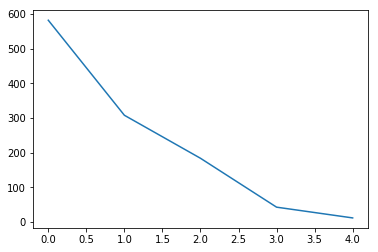

Real Percentage of gain: -60.945139458572555
Percentage of gain: 0.31814535417433426
Total gain: 360.1405409253464
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 51  86]
 [231 214]]
0.45532646048109965
Percentile:  1
[[ 33  18]
 [137 120]]
0.4967532467532468
Percentile:  2
[[75 45]
 [34 30]]
0.5706521739130435
Percentile:  3
[[ 6  7]
 [ 6 24]]
0.6976744186046512
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
111
59
12.867944909532813
0.0
Diff in tren train and test
0.47747349823321555
0.49469964664310956
F1,score 0.6986564299424184
G-score: 0.4427445395176854
Accuracy 0.583922261484099
Window: 140
[[115 457]
 [ 14 546]]
Vol pos 2.887128188382194
Vol neg 3.691128038326929


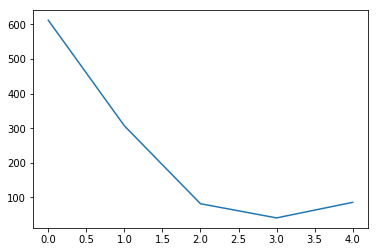

Real Percentage of gain: -98.30624467705123
Percentage of gain: 0.15006221419491755
Total gain: 169.87042646864666
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 50 279]
 [ 13 270]]
0.5228758169934641
Percentile:  1
[[ 46  57]
 [  0 204]]
0.8143322475570033
Percentile:  2
[[ 1 11]
 [ 0 70]]
0.8658536585365854
Percentile:  3
[[ 3 38]
 [ 0  0]]
0.07317073170731707
Percentile:  4
[[15 71]
 [ 0  0]]
0.1744186046511628
000000000000000000000000000000000000000000000000
Working on... COST
111
59
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6527593818984547
0.676678445229682
F1,score 0.17903415783274443
G-score: 0.31196013019221747
Accuracy 0.3842756183745583
Window: 140
[[359   7]
 [690  76]]
Vol pos 1.1944563829099937
Vol neg 1.5660396390707354


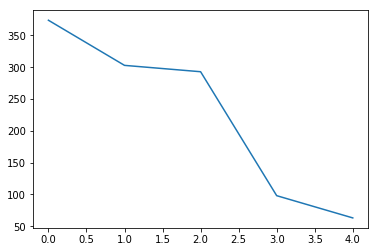

Real Percentage of gain: -172.69902443367548
Percentage of gain: -0.5052483232035825
Total gain: -571.9411018664554
000000000000000000000000000000000000000000000000
Percentile:  0
[[181   7]
 [176   9]]
0.5093833780160858
Percentile:  1
[[ 97   0]
 [187  19]]
0.38283828382838286
Percentile:  2
[[ 68   0]
 [204  21]]
0.3037542662116041
Percentile:  3
[[12  0]
 [80  6]]
0.1836734693877551
Percentile:  4
[[ 0  0]
 [43 20]]
0.31746031746031744
000000000000000000000000000000000000000000000000
Working on... QCOM
111
50
11.725006748852696
0.0
Diff in tren train and test
0.47770419426048566
0.6855123674911661
F1,score 0.583050847457627
G-score: 0.6071125593149757
Accuracy 0.5653710247349824
Window: 140
[[296  60]
 [432 344]]
Vol pos 4.00735320478959
Vol neg 2.468200952443268


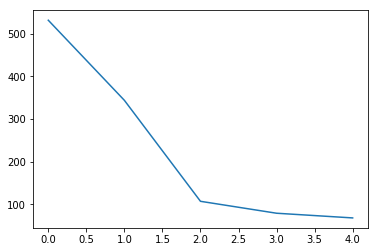

Real Percentage of gain: 69.54851083032479
Percentage of gain: 1.1928897371583476
Total gain: 1350.3511824632494
000000000000000000000000000000000000000000000000
Percentile:  0
[[192  41]
 [206  93]]
0.5357142857142857
Percentile:  1
[[ 44   4]
 [209  87]]
0.3808139534883721
Percentile:  2
[[ 2 15]
 [17 73]]
0.7009345794392523
Percentile:  3
[[11  0]
 [ 0 68]]
1.0
Percentile:  4
[[46  0]
 [ 0 22]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.47049076945427987
Mean gain over portfolio :  -26.359327788081725
Real mean gain over portfolio -39.32014962574361


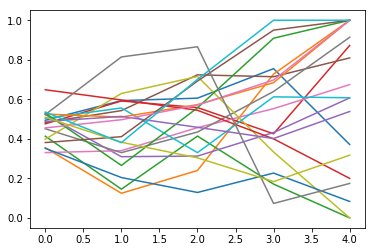

In [5]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        firstprice=price.iloc[1]['open']
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        rf = RandomForestClassifier()
        rf.fit(x, y)
        
       
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        
        treshold=0.8
        optimum=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimum=order[0:u]
                break
        
        print(len(x[0]))
        
        x=x[:,optimum]
        print(len(x[0]))
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

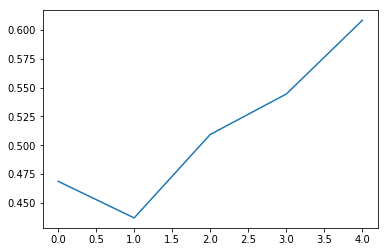

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
111
35
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5483443708609271
0.5512367491166078
F1,score 0.6569987389659521
G-score: 0.33184258057679755
Accuracy 0.519434628975265
Window: 140
[[ 67 441]
 [103 521]]
Vol pos 3.440997622150139
Vol neg 2.85062819365252


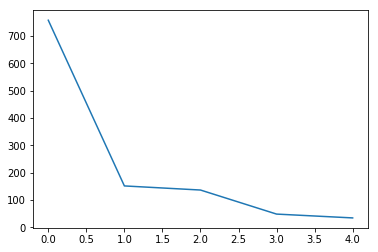

Real Percentage of gain: -5.306842322323778
Percentage of gain: 0.4174601276301331
Total gain: 472.5648644773107
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 11 373]
 [ 18 357]]
0.48484848484848486
Percentile:  1
[[12 54]
 [10 74]]
0.5733333333333334
Percentile:  2
[[44 14]
 [37 42]]
0.6277372262773723
Percentile:  3
[[ 0  0]
 [12 37]]
0.7551020408163265
Percentile:  4
[[ 0  0]
 [25 10]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... AMZN
111
36
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.681828218149702
0.7782685512367491
F1,score 0.28679962013295346
G-score: 0.396303197805485
Accuracy 0.3365724381625442
Window: 140
[[230  21]
 [730 151]]
Vol pos 2.485624924127405
Vol neg 2.293939718601429


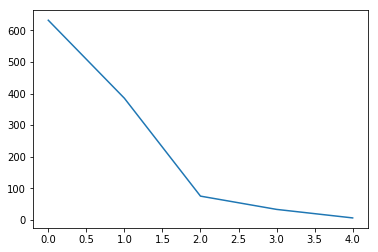

Real Percentage of gain: -185.45370979644323
Percentage of gain: -0.6852699934426959
Total gain: -775.7256325771317
000000000000000000000000000000000000000000000000
Percentile:  0
[[188  11]
 [375  57]]
0.38827258320126784
Percentile:  1
[[ 28   8]
 [297  52]]
0.2077922077922078
Percentile:  2
[[14  2]
 [55  4]]
0.24
Percentile:  3
[[ 0  0]
 [ 2 31]]
0.9393939393939394
Percentile:  4
[[6]]
1.0
000000000000000000000000000000000000000000000000
Working on... PEP
111
40
5.495274763738178
0.0
Diff in tren train and test
0.32886163280950553
0.8634969325153374
F1,score 0.3868194842406877
G-score: 0.489680361182564
Accuracy 0.34355828220858897
Window: 140
[[ 89   0]
 [428 135]]
Vol pos 1.6210872662524582
Vol neg 2.336811957103764


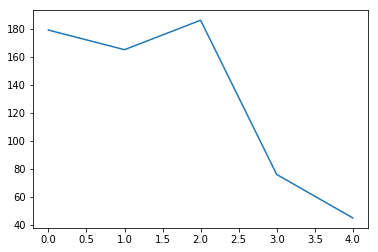

Real Percentage of gain: -88.09649819921863
Percentage of gain: -0.977042898772792
Total gain: -637.0319699998604
000000000000000000000000000000000000000000000000
Percentile:  0
[[70  0]
 [87 22]]
0.5139664804469274
Percentile:  1
[[ 19   0]
 [122  24]]
0.2606060606060606
Percentile:  2
[[  0   0]
 [108  78]]
0.41935483870967744
Percentile:  3
[[ 0  0]
 [65 11]]
0.14473684210526316
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
111
43
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6281739898432325
0.598939929328622
F1,score 0.6644736842105264
G-score: 0.43812279196026216
Accuracy 0.549469964664311
Window: 140
[[117 337]
 [173 505]]
Vol pos 3.124417192598495
Vol neg 2.7284942971792283


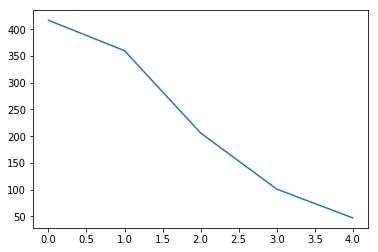

Real Percentage of gain: 39.600545206336754
Percentage of gain: 0.487504772292277
Total gain: 551.8554022348576
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 86 145]
 [ 54 131]]
0.5216346153846154
Percentile:  1
[[ 10 101]
 [ 57 192]]
0.5611111111111111
Percentile:  2
[[21 76]
 [20 89]]
0.5339805825242718
Percentile:  3
[[ 0 14]
 [40 47]]
0.46534653465346537
Percentile:  4
[[ 0  0]
 [ 2 45]]
0.9574468085106383
000000000000000000000000000000000000000000000000
Working on... MSFT
111
39
5.843279709392834
0.0
Diff in tren train and test
0.6783664459161148
0.622791519434629
F1,score 0.18939393939393936
G-score: 0.32154827497387006
Accuracy 0.43286219081272087
Window: 140
[[415  12]
 [630  75]]
Vol pos 1.4256803542534142
Vol neg 1.6751191572282607


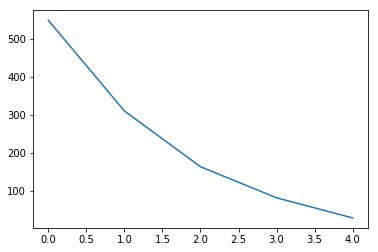

Real Percentage of gain: -33.51062815746834
Percentage of gain: -0.33290028741728833
Total gain: -376.84312535637036
000000000000000000000000000000000000000000000000
Percentile:  0
[[290  10]
 [237  12]]
0.5500910746812386
Percentile:  1
[[ 72   2]
 [222  14]]
0.27741935483870966
Percentile:  2
[[ 23   0]
 [117  23]]
0.2822085889570552
Percentile:  3
[[20  0]
 [43 18]]
0.4691358024691358
Percentile:  4
[[10  0]
 [10  8]]
0.6428571428571429
000000000000000000000000000000000000000000000000
Working on... FB
111
47
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5688741721854305
0.7676678445229682
F1,score 0.6159317211948792
G-score: 0.5488513640248972
Accuracy 0.5229681978798587
Window: 140
[[159 104]
 [436 433]]
Vol pos 3.4695849538616814
Vol neg 2.652259965847123


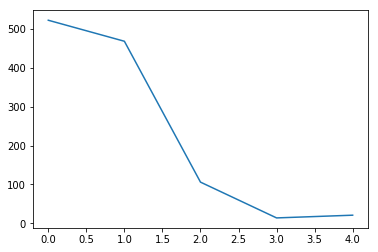

Real Percentage of gain: -19.98533025949443
Percentage of gain: 0.5492702395129584
Total gain: 621.7739111286689
000000000000000000000000000000000000000000000000
Percentile:  0
[[153  59]
 [226  84]]
0.4540229885057471
Percentile:  1
[[  6  31]
 [190 241]]
0.5277777777777778
Percentile:  2
[[ 0 13]
 [17 75]]
0.7142857142857143
Percentile:  3
[[14]]
1.0
Percentile:  4
[[ 0  0]
 [ 3 18]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... INTC
111
39
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.5922737306843268
0.6033568904593639
F1,score 0.020289855072463767
G-score: 0.10123686039860924
Accuracy 0.4028268551236749
Window: 140
[[449   0]
 [676   7]]
Vol pos 2.623242067571576
Vol neg 2.1393852425704023


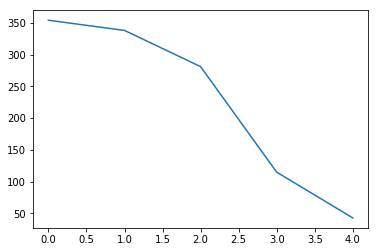

Real Percentage of gain: -94.2333167628804
Percentage of gain: -0.22087106109978188
Total gain: -250.0260411649531
000000000000000000000000000000000000000000000000
Percentile:  0
[[116   0]
 [237   1]]
0.3305084745762712
Percentile:  1
[[114   0]
 [221   6]]
0.3519061583577713
Percentile:  2
[[127   0]
 [151   0]]
0.4568345323741007
Percentile:  3
[[63  0]
 [51  0]]
0.5526315789473685
Percentile:  4
[[29  0]
 [14  0]]
0.6744186046511628
000000000000000000000000000000000000000000000000
Working on... CSCO
111
35
6.455652128779988
0.0
Diff in tren train and test
0.6774122322808567
0.5485865724381626
F1,score 0.0
G-score: 0.0
Accuracy 0.45141342756183744
Window: 140
[[511   0]
 [621   0]]
Vol pos 2.1637721407796304
Vol neg 1.5810780547463121


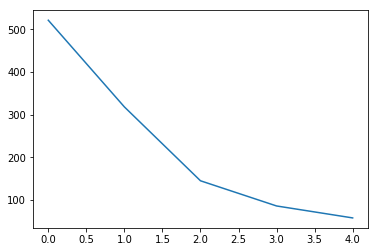

Real Percentage of gain: 52.15937382119952
Percentage of gain: 0.1093976077216708
Total gain: 123.83809194093135
000000000000000000000000000000000000000000000000
Percentile:  0
[[231   0]
 [290   0]]
0.44337811900191937
Percentile:  1
[[105   0]
 [213   0]]
0.330188679245283
Percentile:  2
[[64  0]
 [81  0]]
0.4413793103448276
Percentile:  3
[[58  0]
 [28  0]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
111
40
10.63829787234043
0.0
Diff in tren train and test
0.4561713402517112
0.5220848056537103
F1,score 0.6885050625372245
G-score: 0.2367295067104836
Accuracy 0.5379858657243817
Window: 140
[[ 31 510]
 [ 13 578]]
Vol pos 2.908270148649121
Vol neg 2.800470936657618


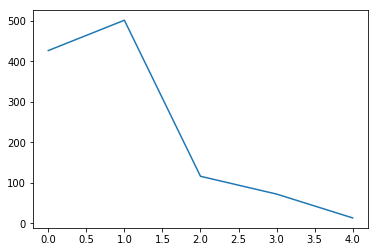

Real Percentage of gain: 196.20322163095048
Percentage of gain: 0.27075107831747386
Total gain: 306.4902206553804
000000000000000000000000000000000000000000000000
Percentile:  0
[[  1 226]
 [  6 194]]
0.4566744730679157
Percentile:  1
[[  4 194]
 [  7 297]]
0.599601593625498
Percentile:  2
[[11 31]
 [ 0 74]]
0.7327586206896551
Percentile:  3
[[12 48]
 [ 0 12]]
0.3333333333333333
Percentile:  4
[[ 2 11]
 [ 0  0]]
0.15384615384615385
000000000000000000000000000000000000000000000000
Working on... NVDA
111
38
14.360220994475142
0.0
Diff in tren train and test
0.64878587196468
0.5795053003533569
F1,score 0.5023607176581681
G-score: 0.5373846678173513
Accuracy 0.534452296819788
Window: 140
[[339 137]
 [390 266]]
Vol pos 4.189218253802112
Vol neg 3.2927284719211314


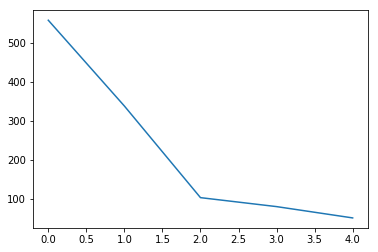

Real Percentage of gain: 16.665581884551273
Percentage of gain: 0.7060151403249484
Total gain: 799.2091388478416
000000000000000000000000000000000000000000000000
Percentile:  0
[[224  88]
 [184  62]]
0.5125448028673835
Percentile:  1
[[ 97  21]
 [138  82]]
0.5295857988165681
Percentile:  2
[[14 17]
 [49 23]]
0.3592233009708738
Percentile:  3
[[ 4 11]
 [10 55]]
0.7375
Percentile:  4
[[ 0  0]
 [ 8 43]]
0.8431372549019608
000000000000000000000000000000000000000000000000
Working on... NFLX
111
41
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6529035107087657
0.7376325088339223
F1,score 0.05145413870246085
G-score: 0.15558320342559193
Accuracy 0.2508833922261484
Window: 140
[[261  36]
 [812  23]]
Vol pos 3.2210543409014076
Vol neg 4.712753726935651


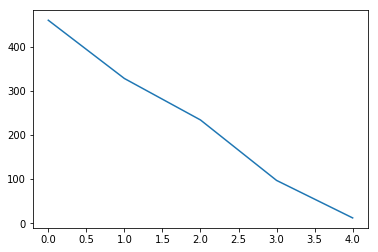

Real Percentage of gain: -424.15689949495936
Percentage of gain: -2.7222930456055057
Total gain: -3081.6357276254325
000000000000000000000000000000000000000000000000
Percentile:  0
[[150  20]
 [283   7]]
0.34130434782608693
Percentile:  1
[[ 59   1]
 [254  14]]
0.2225609756097561
Percentile:  2
[[ 29   9]
 [193   2]]
0.13304721030042918
Percentile:  3
[[21  6]
 [70  0]]
0.21649484536082475
Percentile:  4
[[ 1  0]
 [11  0]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
111
31
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5880195599022005
0.6748166259168704
F1,score 0.6919431279620852
G-score: 0.7273138987028757
Accuracy 0.6821515892420538
Window: 140
[[133   0]
 [130 146]]
Vol pos 1.2894342025035626
Vol neg 0.6898369079724398


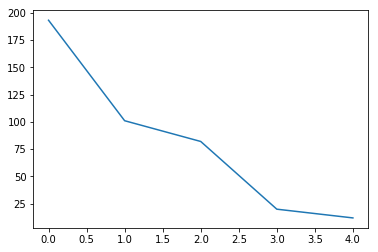

Real Percentage of gain: 189.8207823455782
Percentage of gain: 0.6603260255796499
Total gain: 270.0733444620768
000000000000000000000000000000000000000000000000
Percentile:  0
[[99  0]
 [82 15]]
0.5816326530612245
Percentile:  1
[[26  0]
 [36 36]]
0.6326530612244898
Percentile:  2
[[ 7  0]
 [12 63]]
0.8536585365853658
Percentile:  3
[[19]]
1.0
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
111
34
9.949148290880911
0.0
Diff in tren train and test
0.714569536423841
0.6528268551236749
F1,score 0.3319838056680162
G-score: 0.4170410332230685
Accuracy 0.4169611307420495
Window: 140
[[308  85]
 [575 164]]
Vol pos 2.832658512208757
Vol neg 2.4998604350621245


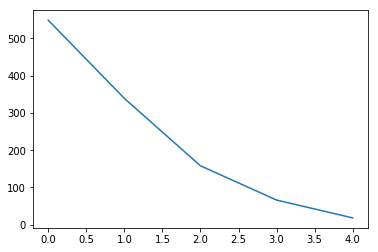

Real Percentage of gain: -198.65067853542547
Percentage of gain: -0.2764073051046545
Total gain: -312.8930693784689
000000000000000000000000000000000000000000000000
Percentile:  0
[[217  50]
 [250  32]]
0.453551912568306
Percentile:  1
[[ 43  35]
 [220  41]]
0.24778761061946902
Percentile:  2
[[25  0]
 [86 47]]
0.45569620253164556
Percentile:  3
[[23  0]
 [18 25]]
0.7272727272727273
Percentile:  4
[[18]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
111
51
6.235840507476206
0.0
Diff in tren train and test
0.5365422830646942
0.7190812720848057
F1,score 0.6963613550815558
G-score: 0.4465418871134339
Accuracy 0.5724381625441696
Window: 140
[[ 93 225]
 [259 555]]
Vol pos 1.7353676106533868
Vol neg 2.114989478169441


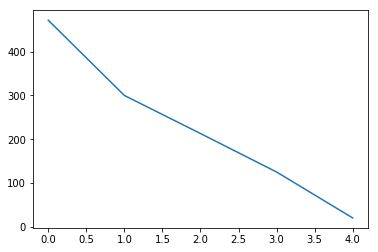

Real Percentage of gain: 141.393484959751
Percentage of gain: 0.08910185889521666
Total gain: 100.86330426938525
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 54 109]
 [ 73 236]]
0.614406779661017
Percentile:  1
[[ 21  34]
 [ 81 164]]
0.6166666666666667
Percentile:  2
[[  6  20]
 [ 80 107]]
0.5305164319248826
Percentile:  3
[[12 44]
 [25 44]]
0.448
Percentile:  4
[[ 0 17]
 [ 0  3]]
0.15
000000000000000000000000000000000000000000000000
Working on... TXN
111
35
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6904393905939501
0.6740282685512368
F1,score 0.5567522783761392
G-score: 0.5581031070452244
Accuracy 0.5273851590106007
Window: 140
[[261 108]
 [427 336]]
Vol pos 2.5386767792523086
Vol neg 2.446531600767516


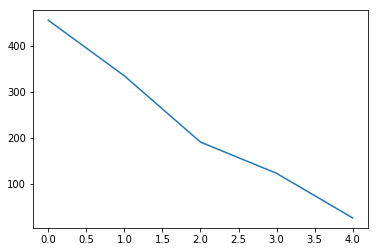

Real Percentage of gain: -18.953187226660816
Percentage of gain: 0.1825933134302183
Total gain: 206.69563080300713
000000000000000000000000000000000000000000000000
Percentile:  0
[[140  68]
 [183  64]]
0.44835164835164837
Percentile:  1
[[ 96  34]
 [ 75 130]]
0.6746268656716418
Percentile:  2
[[  8   6]
 [ 76 102]]
0.5729166666666666
Percentile:  3
[[10  0]
 [85 27]]
0.30327868852459017
Percentile:  4
[[ 7  0]
 [ 7 12]]
0.7307692307692307
000000000000000000000000000000000000000000000000
Working on... AVGO
111
45
10.183057294555825
0.0
Diff in tren train and test
0.502539191874586
0.6369257950530035
F1,score 0.6990033222591362
G-score: 0.5211347628240895
Accuracy 0.5998233215547704
Window: 140
[[153 258]
 [195 526]]
Vol pos 3.5422114254994055
Vol neg 2.5468755857285563


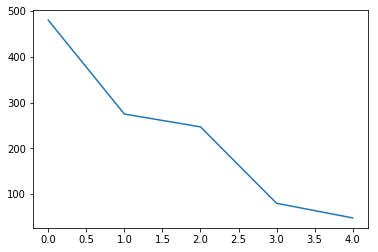

Real Percentage of gain: 124.08024269699035
Percentage of gain: 1.1055008105822086
Total gain: 1251.4269175790603
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 59 147]
 [ 67 207]]
0.5541666666666667
Percentile:  1
[[43 82]
 [67 83]]
0.4581818181818182
Percentile:  2
[[  8  17]
 [ 58 164]]
0.6963562753036437
Percentile:  3
[[13  4]
 [ 3 60]]
0.9125
Percentile:  4
[[29  8]
 [ 0 11]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... PYPL
111
47
12.136266855926186
0.0
Diff in tren train and test
0.704635761589404
0.7164310954063604
F1,score 0.5171875
G-score: 0.4823658998937629
Accuracy 0.4540636042402827
Window: 140
[[183 138]
 [480 331]]
Vol pos 3.4063540630874773
Vol neg 2.4807302705735714


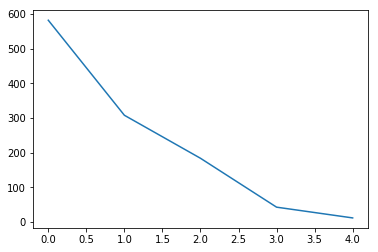

Real Percentage of gain: -110.01015176374068
Percentage of gain: 0.19238046043506737
Total gain: 217.77468121249626
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 50  87]
 [276 169]]
0.37628865979381443
Percentile:  1
[[ 44   7]
 [168  89]]
0.4318181818181818
Percentile:  2
[[85 35]
 [28 36]]
0.657608695652174
Percentile:  3
[[ 4  9]
 [ 8 22]]
0.6046511627906976
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
111
44
12.867944909532813
0.0
Diff in tren train and test
0.47747349823321555
0.49469964664310956
F1,score 0.1741682974559687
G-score: 0.2351416241684645
Accuracy 0.254416961130742
Window: 140
[[199 373]
 [471  89]]
Vol pos 1.9061198052100405
Vol neg 3.6705575055356876


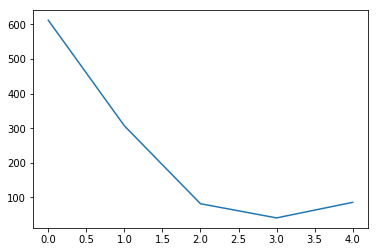

Real Percentage of gain: -452.08101870930517
Percentage of gain: -2.2517562109290004
Total gain: -2548.9880307716285
000000000000000000000000000000000000000000000000
Percentile:  0
[[137 192]
 [214  69]]
0.3366013071895425
Percentile:  1
[[ 55  48]
 [188  16]]
0.23127035830618892
Percentile:  2
[[ 1 11]
 [66  4]]
0.06097560975609756
Percentile:  3
[[ 2 39]
 [ 0  0]]
0.04878048780487805
Percentile:  4
[[ 4 82]
 [ 0  0]]
0.046511627906976744
000000000000000000000000000000000000000000000000
Working on... COST
111
43
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6527593818984547
0.676678445229682
F1,score 0.21354764638346727
G-score: 0.34267954199437806
Accuracy 0.3948763250883392
Window: 140
[[354  12]
 [673  93]]
Vol pos 1.2748499358842893
Vol neg 1.5200879323472591


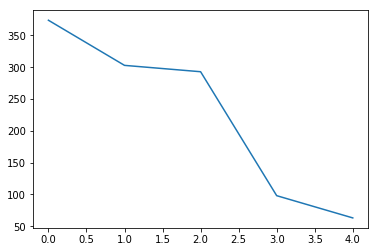

Real Percentage of gain: -137.8522023377978
Percentage of gain: -0.41643313808974836
Total gain: -471.4023123175951
000000000000000000000000000000000000000000000000
Percentile:  0
[[177  11]
 [173  12]]
0.5067024128686327
Percentile:  1
[[ 96   1]
 [187  19]]
0.3795379537953795
Percentile:  2
[[ 68   0]
 [206  19]]
0.29692832764505117
Percentile:  3
[[12  0]
 [77  9]]
0.21428571428571427
Percentile:  4
[[ 0  0]
 [30 33]]
0.5238095238095238
000000000000000000000000000000000000000000000000
Working on... QCOM
111
37
11.725006748852696
0.0
Diff in tren train and test
0.47770419426048566
0.6855123674911661
F1,score 0.4728312678741658
G-score: 0.5451097847229234
Accuracy 0.5114840989399293
Window: 140
[[331  25]
 [528 248]]
Vol pos 3.780718408355264
Vol neg 2.8752711776306157


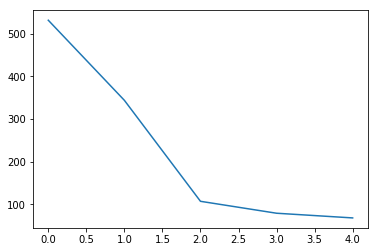

Real Percentage of gain: 43.334235860409045
Percentage of gain: 0.5291616583109253
Total gain: 599.0109972079674
000000000000000000000000000000000000000000000000
Percentile:  0
[[214  19]
 [236  63]]
0.5206766917293233
Percentile:  1
[[ 48   0]
 [200  96]]
0.4186046511627907
Percentile:  2
[[11  6]
 [68 22]]
0.308411214953271
Percentile:  3
[[11  0]
 [23 45]]
0.7088607594936709
Percentile:  4
[[46  0]
 [ 0 22]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.4648013946326028
Mean gain over portfolio :  -146.64847021862283
Real mean gain over portfolio -48.251649757997576


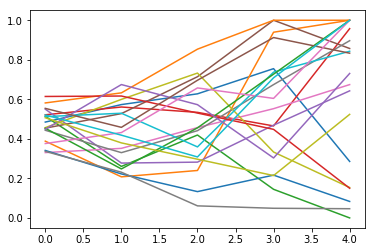

In [7]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        firstprice=price.iloc[1]['open']
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        rf = RandomForestClassifier()
        rf.fit(x, y)
        
       
        order=rf.feature_importances_.argsort()[-len(rf.feature_importances_):][::-1]
        
        treshold=0.7
        optimum=[]
        for u in range(0,len(order)):
            if(sum(rf.feature_importances_[order[0:u]])>treshold):
                optimum=order[0:u]
                break
        
        print(len(x[0]))
        
        x=x[:,optimum]
        print(len(x[0]))
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

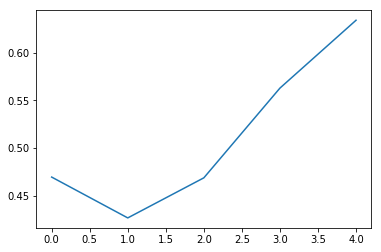

In [8]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()